In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 

[*********************100%***********************]  4 of 4 completed


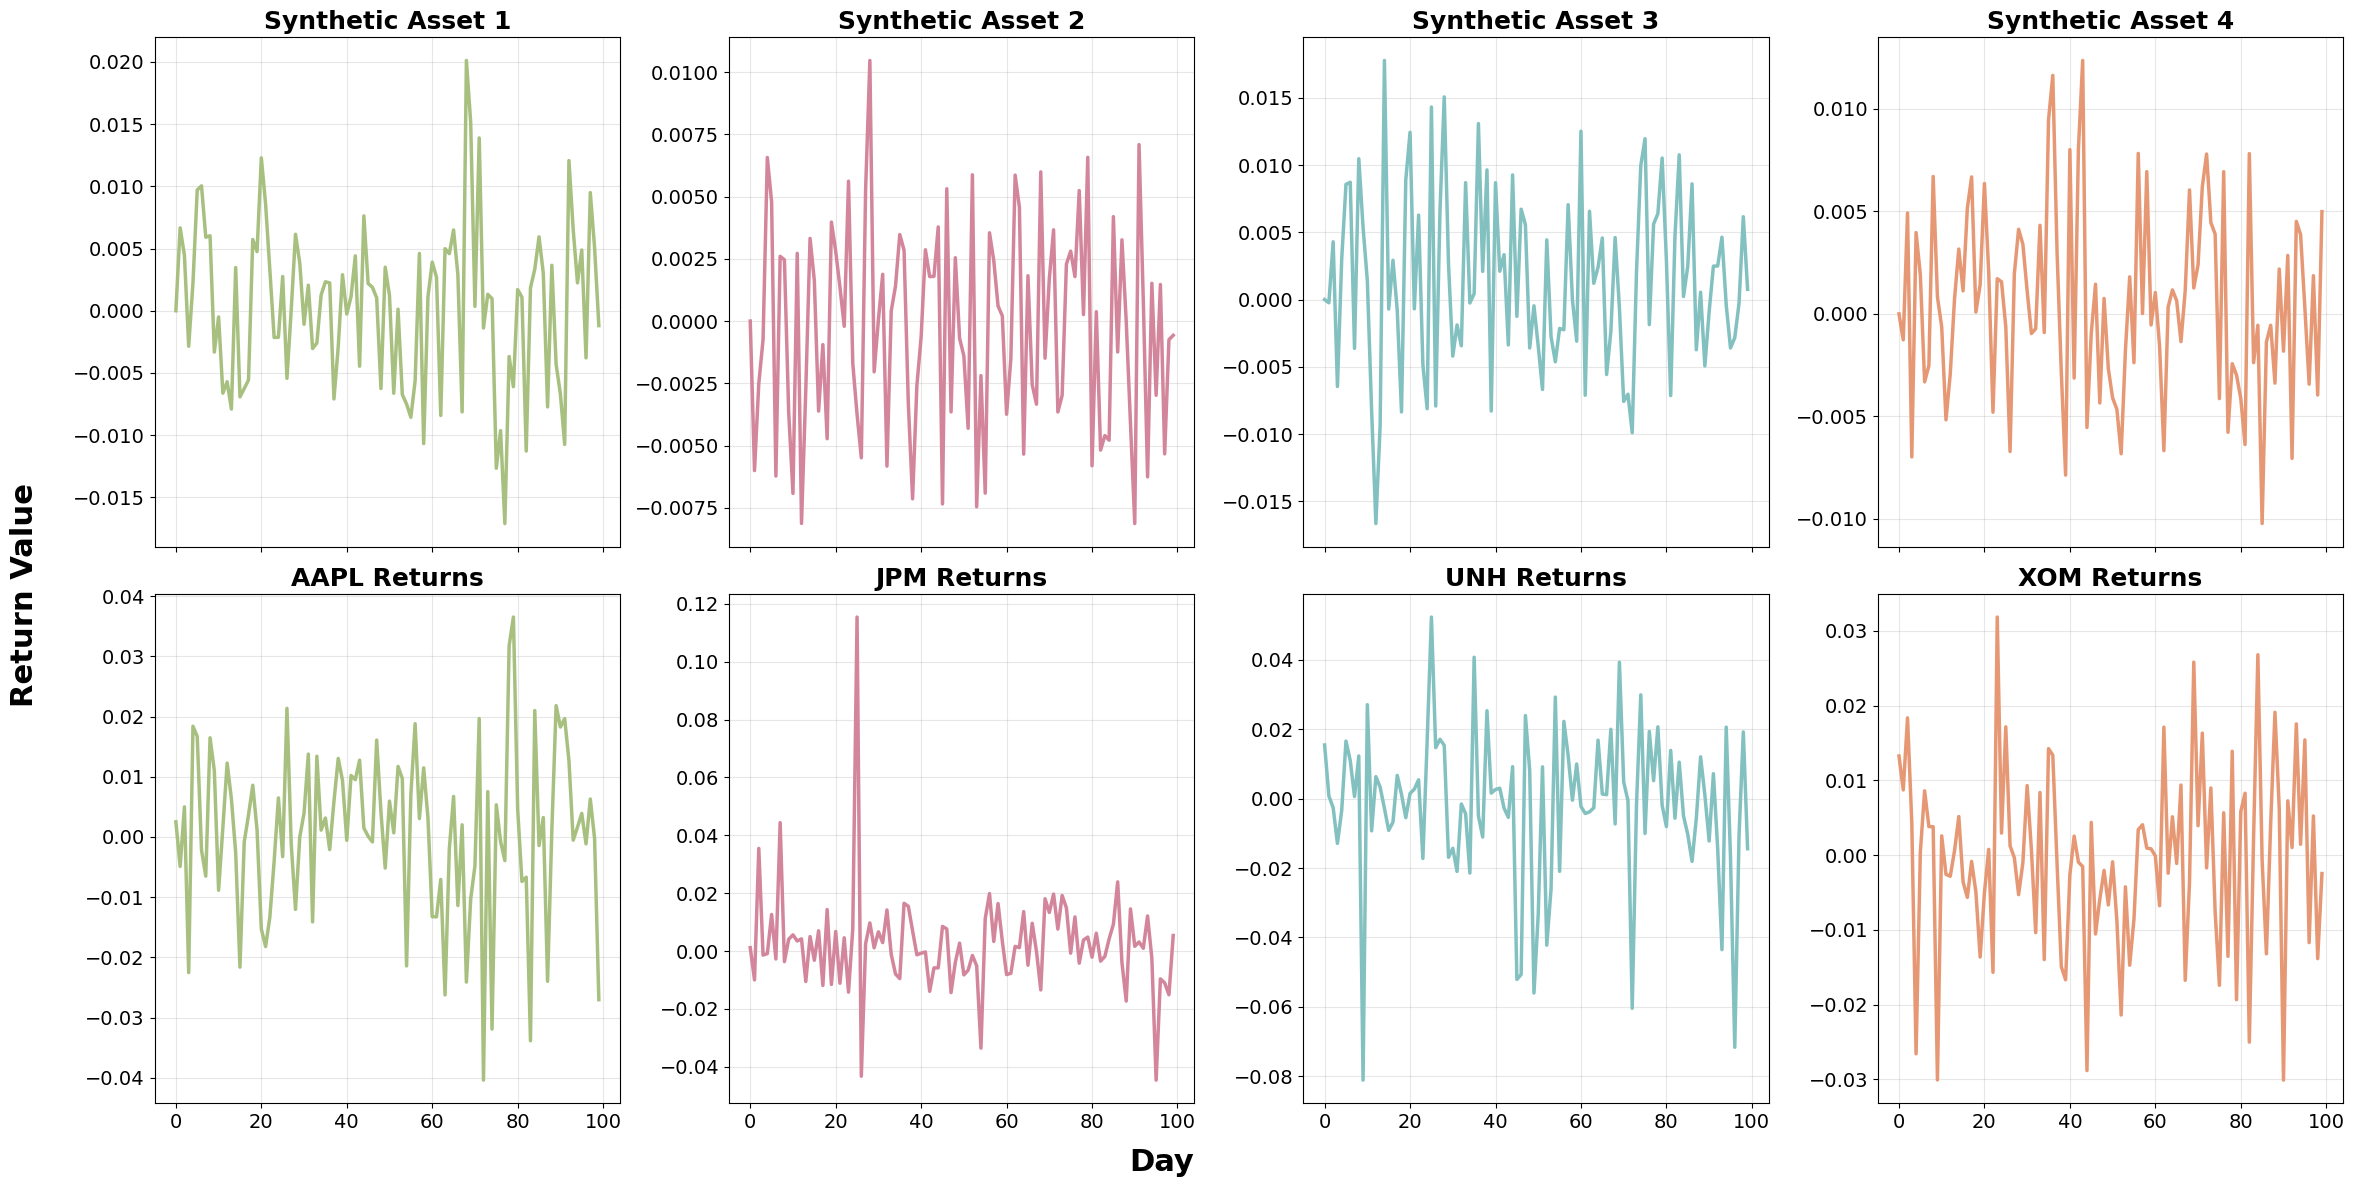

In [ ]:

# Load your synthetic returns
assetreturns = pd.read_csv('assetReturns_garch.csv', parse_dates=True)

# Pick synthetic assets 1–4 (Python index 0–3)
synthetic = assetreturns.iloc[:100, 0:4]

# Real tickers from different sectors
tickers = ['AAPL', 'JPM', 'UNH', 'XOM']

# Download daily data 
real_data = yf.download(tickers, start='2024-10-01', end='2025-07-01', auto_adjust=False)['Adj Close']
real_returns = real_data.pct_change().dropna().iloc[:100]

fig, axs = plt.subplots(2, 4, figsize=(24, 12), sharex=True)  # Increased from (40, 20) to (24, 12)
time_steps = np.arange(100)

colors =  ['#A7C080', '#D3869B', "#83C0C0", '#E69875']

# Plot synthetic with larger elements
for i in range(4):
    axs[0, i].plot(time_steps, synthetic.iloc[:, i], color=colors[i], linewidth=2.5)
    axs[0, i].set_title(f"Synthetic Asset {i+1}", fontsize=18, fontweight='bold')
    axs[0, i].grid(True, alpha=0.3)
    axs[0, i].tick_params(axis='both', which='major', labelsize=14)

for i in range(4):
    axs[1, i].plot(time_steps, real_returns.iloc[:, i], color=colors[i], linewidth=2.5)
    axs[1, i].set_title(f"{tickers[i]} Returns", fontsize=18, fontweight='bold')
    axs[1, i].grid(True, alpha=0.3)
    axs[1, i].tick_params(axis='both', which='major', labelsize=14)

# Shared axes labels with larger font
fig.text(0.5, 0.02, 'Day', ha='center', fontsize=22, fontweight='bold')
fig.text(0.02, 0.5, 'Return Value', va='center', rotation='vertical', fontsize=22, fontweight='bold')

plt.tight_layout(rect=[0.04, 0.04, 1, 1])


plt.savefig('returns_comparison.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

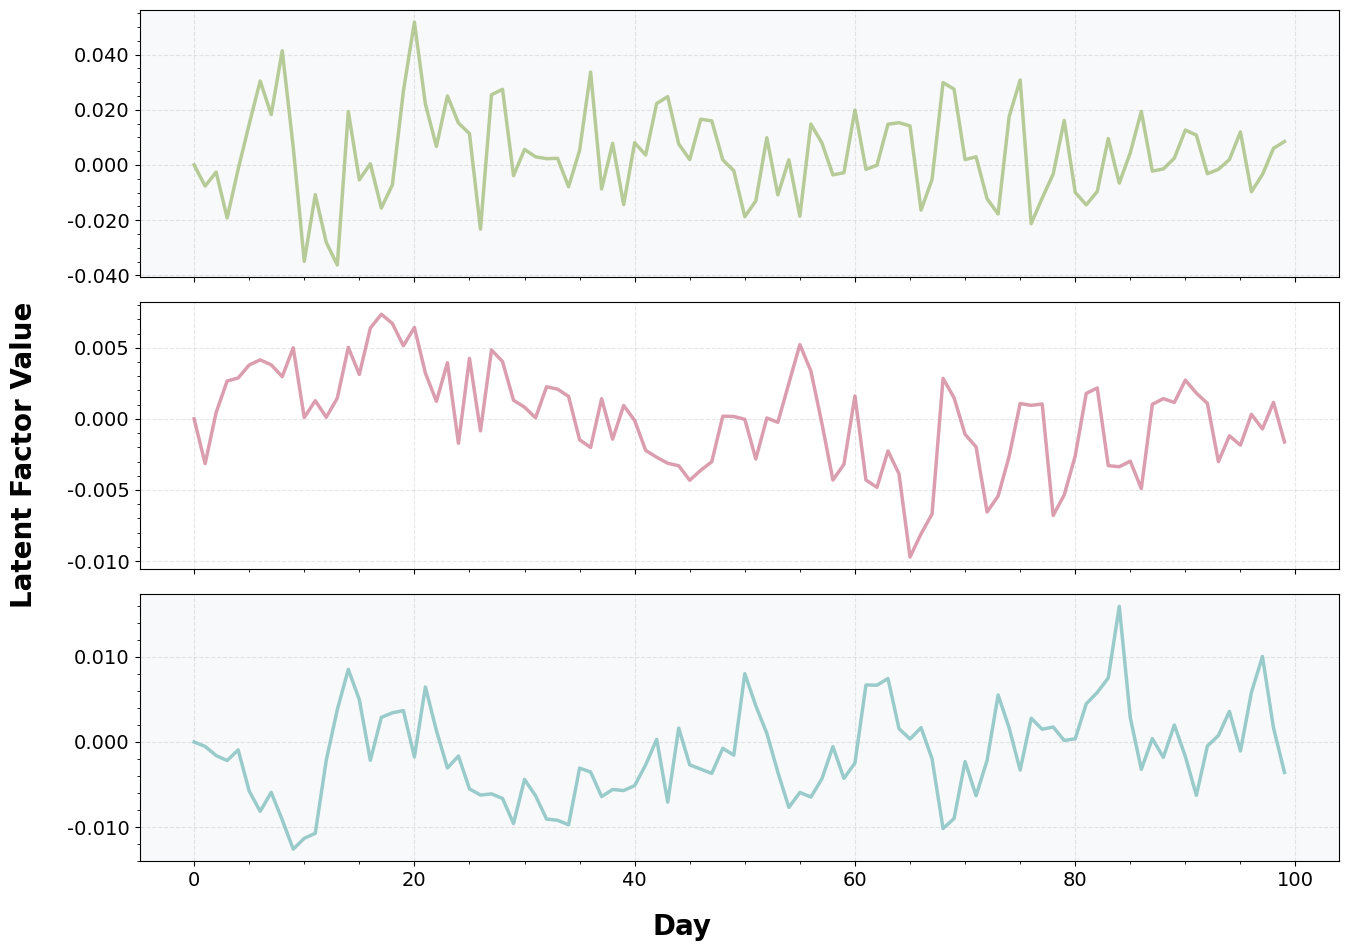

In [ ]:
latentfactors = pd.read_csv('latentFactors_garch.csv', parse_dates=True)
latent_subset = latentfactors.iloc[:100, :3]
time_steps = np.arange(100)

colors = ['#A7C080', '#D3869B', "#83C0C0"]


fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)  
axs = np.atleast_1d(axs)

for i in range(3):
    axs[i].plot(time_steps, latent_subset.iloc[:, i], color=colors[i], 
                linewidth=2.5, alpha=0.8)  # Thicker lines with slight transparency
    axs[i].grid(True, alpha=0.3, linestyle='--')  # Dashed grid lines
    axs[i].tick_params(axis='both', which='major', labelsize=14)
    
    if i % 2 == 0:
        axs[i].set_facecolor('#f8f9fa')
    
    # Improve y-axis formatting
    axs[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))
    
    axs[i].minorticks_on()
    axs[i].tick_params(axis='both', which='minor')

# Enhanced axis labels
fig.text(0.5, 0.02, 'Day', ha='center', fontsize=20, fontweight='bold')
fig.text(0.02, 0.5, 'Latent Factor Value', va='center', rotation='vertical', 
         fontsize=20, fontweight='bold')

# Better layout with more padding
plt.tight_layout(rect=[0.05, 0.05, 0.98, 0.96])

# Save with high quality for LaTeX
plt.savefig('latent_factors.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

[*********************100%***********************]  4 of 4 completed


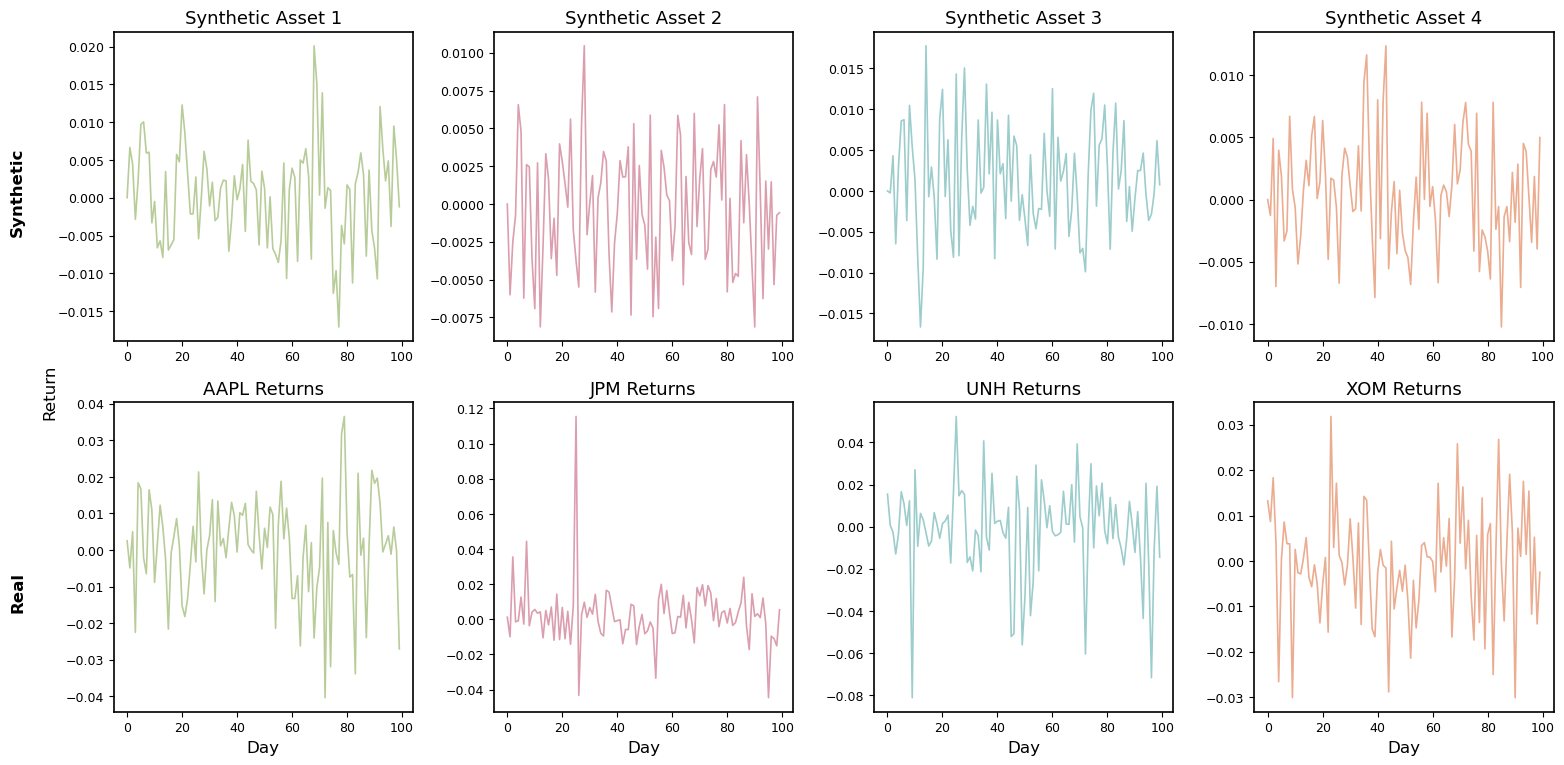

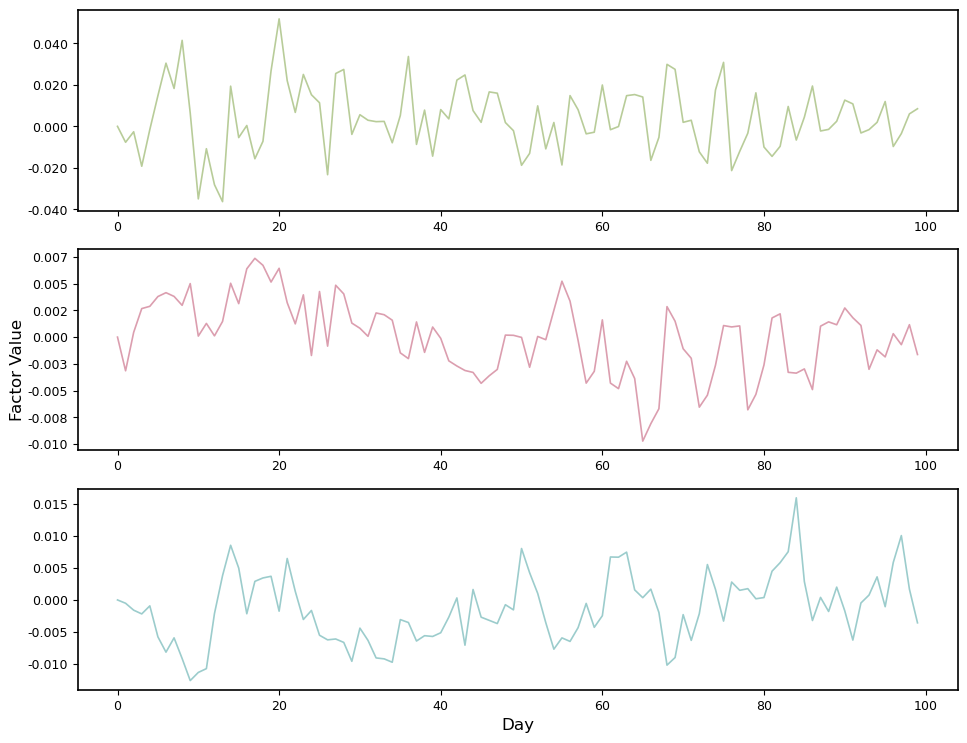

In [ ]:
# Set publication-quality plot parameters
plt.rcParams.update({
    'font.size': 12,
    'axes.linewidth': 1.2,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 14,
    'lines.linewidth': 1.5,
    'axes.grid': False,
    'axes.axisbelow': True,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

# ===================== FIGURE 1: RETURNS COMPARISON =====================
# Load data (assuming your data loading code)
assetreturns = pd.read_csv('assetReturns_garch.csv', parse_dates=True)
synthetic = assetreturns.iloc[:100, 0:4]
tickers = ['AAPL', 'JPM', 'UNH', 'XOM']
real_data = yf.download(tickers, start='2024-10-01', end='2025-07-01', auto_adjust=False)['Adj Close']
real_returns = real_data.pct_change().dropna().iloc[:100]

# Create the returns comparison figure
fig1, axs1 = plt.subplots(2, 4, figsize=(16, 8))
time_steps = np.arange(100)
colors = ['#A7C080', '#D3869B', "#83C0C0", '#E69875']

# Plot synthetic returns
for i in range(4):
    axs1[0, i].plot(time_steps, synthetic.iloc[:, i], color=colors[i], linewidth=1.2, alpha=0.8)
    axs1[0, i].set_title(f'Synthetic Asset {i+1}', fontweight='normal')
    #axs1[0, i].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    axs1[0, i].tick_params(axis='both', which='major', labelsize=9)
    axs1[0, i].set_ylim(axs1[0, i].get_ylim())  # Fix y-axis limits

# Plot real returns
for i in range(4):
    axs1[1, i].plot(time_steps, real_returns.iloc[:, i], color=colors[i], linewidth=1.2, alpha=0.8)
    axs1[1, i].set_title(f'{tickers[i]} Returns', fontweight='normal')
    #axs1[1, i].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    axs1[1, i].tick_params(axis='both', which='major', labelsize=9)
    axs1[1, i].set_xlabel('Day')

# Add row labels
fig1.text(0.02, 0.75, 'Synthetic', rotation=90, va='center', ha='center', fontsize=12, fontweight='bold')
fig1.text(0.02, 0.25, 'Real', rotation=90, va='center', ha='center', fontsize=12, fontweight='bold')

# Common y-label
fig1.text(0.04, 0.5, 'Return', rotation=90, va='center', ha='center', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.1)

# Save as high-resolution PNG and PDF
plt.savefig('figure1_returns_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


# Load latent factors data
latentfactors = pd.read_csv('latentFactors_garch.csv', parse_dates=True)
latent_subset = latentfactors.iloc[:100, :3]

fig2, axs2 = plt.subplots(3, 1, figsize=(10, 8))
axs2 = np.atleast_1d(axs2)

latent_colors = ['#A7C080', '#D3869B', "#83C0C0"]

factor_names = ['Factor 1', 'Factor 2', 'Factor 3'] 

for i in range(3):
    axs2[i].plot(time_steps, latent_subset.iloc[:, i], color=latent_colors[i], 
                linewidth=1.2, alpha=0.8)
    #axs2[i].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    axs2[i].tick_params(axis='both', which='major', labelsize=9)
    


    # Format y-axis to show reasonable number of decimal places
    axs2[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))

# Only label x-axis on bottom plot
axs2[2].set_xlabel('Day')

# Common y-label
fig2.text(0.04, 0.5, 'Factor Value', rotation=90, va='center', ha='center', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.98, top=0.95, bottom=0.1)

# Save as high-resolution PNG and PDF
plt.savefig('figure2_latent_factors.png', dpi=300, bbox_inches='tight')
plt.show()

# Reset matplotlib parameters to default after plotting
plt.rcdefaults()
